# Trabajo Práctico N°2: "Un primer encuentro con la EPH"

## Parte I: Familiarizándonos con la base EPH y limpieza

### Elección de región y unificación de microdatos

Región elegida: Noreste (código: 41)

In [3]:
import os
import numpy as np
import pandas as pd
import openpyxl as pyxl

Comenzamos el proceso de recorte y limpieza de datos:

In [4]:
# Obtener la ruta del directorio actual 
ruta = os.getcwd()
print(ruta)

C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2


In [5]:
# Importación de bases de datos. Las rutas de acceso que se leen en el output de esta celda deben ser modificadas de acuerdo al directorio propio.

db05_raw = pd.read_stata(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T105.dta")
db25_raw = pd.read_excel(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T125.xlsx")

In [6]:
# Verificación de importación 1
db05_raw.describe()

,nro_hogar,ano4,pondera,pp03d,pp3e_tot,pp3f_tot,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,...,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,ipcf
count,47030.000000,47030.0,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,...,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000
mean,1.041080,2005.0,494.545822,0.065979,15.085690,0.686477,0.034723,0.050606,0.115926,0.030257,...,0.466085,0.678673,0.579417,8.793642,2.365299,0.016691,6.548267,78.944525,1315.167872,358.693196
std,0.219634,0.0,466.800727,0.384652,38.391871,15.576869,0.235051,1.127553,1.480902,1.164662,...,22.283275,35.306324,14.581346,67.350950,266.756548,1.669699,55.623504,384.513324,1365.267645,443.049207
min,1.000000,2005.0,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2005.0,199.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000,125.000000
50%,1.000000,2005.0,298.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,950.000000,236.250000
75%,1.000000,2005.0,538.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1660.000000,442.375000
max,6.000000,2005.0,5707.000000,9.000000,999.000000,999.000000,6.000000,99.000000,99.000000,99.000000,...,3000.000000,4000.000000,1300.000000,3000.000000,50000.000000,180.000000,2500.000000,50000.000000,52050.000000,13012.500000


In [7]:
# Verificación de importación 2
db25_raw.describe()

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,AGLOMERADO,PONDERA,CH03,CH04,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
count,45425.0,45425.0,45425.000000,45425.000000,45425.000000,45425.000000,45425.000000,45425.000000,45425.000000,45425.000000,...,45425.000000,45425.000000,45425.000000,45425.000000,33482.000000,33482.000000,14933.000000,18549.000000,29140.000000,33482.000000
mean,2025.0,1.0,1.034673,2.425427,0.890985,35.524931,23.079141,657.065008,2.432625,1.519736,...,840.512009,1773.506879,1939.212680,1171.766164,5.331223,5.525297,5.248979,5.607526,5.493892,5.523804
std,0.0,0.0,0.684265,1.586030,0.316915,15.018556,17.200937,867.404499,1.590385,0.499616,...,9978.214008,15706.103909,11681.521796,9142.098336,2.770196,2.862296,2.766814,2.849495,2.852169,2.867657
min,2025.0,1.0,1.000000,1.000000,0.000000,1.000000,2.000000,21.000000,1.000000,1.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2025.0,1.0,1.000000,1.000000,1.000000,40.000000,10.000000,181.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2025.0,1.0,1.000000,2.000000,1.000000,42.000000,22.000000,319.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2025.0,1.0,1.000000,3.000000,1.000000,43.000000,32.000000,684.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,2025.0,1.0,72.000000,56.000000,2.000000,44.000000,93.000000,8257.000000,10.000000,2.000000,...,450000.000000,600000.000000,350000.000000,342550.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
# Recortamos los datasets
db05 = db05_raw[db05_raw["region"] == "NEA"].copy()
db25 = db25_raw[db25_raw["REGION"] == 41].copy()

In [9]:
# Verificación de recorte 1
db05.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5453 entries, 18832 to 24284
Columns: 176 entries, CODUSU to idimpp
dtypes: category(94), float64(46), object(36)
memory usage: 4.0+ MB


In [10]:
# Verificación de recorte 2
db25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 14 to 45413
Columns: 235 entries, CODUSU to P_ADECCF
dtypes: float64(150), int64(80), object(5)
memory usage: 8.5+ MB


In [9]:
# Convertir de categorical a object
db05['region'] = db05['region'].astype('object')
# Ahora reemplazamos para luego poder hacer el join mediante el código '41'
db05.loc[db05['region'] == 'NEA', 'region'] = 41

print(db05['region'].unique())
print(db25['REGION'].unique())

[41]
[41]


In [11]:
#Para el proceso de elección de variables, empezamos descartando aquellas variables que figuren sólo en uno de ambos Datasets.
#Evaluamos cuáles son:
db05.columns = db05.columns.str.upper()
cols05 = list(db05.columns.str.upper())
cols25 = list(db25.columns)

In [12]:
cols05_filtro = []
cols05_descarte = []

for col in cols05:
    if col in cols25:
        cols05_filtro.append(col)
    else:
        cols05_descarte.append(col)

print(cols05_filtro)
print()

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [13]:
cols25_nuevas = []
cols25_viejas = []
for col in cols25:
    if col not in cols05:
        cols25_nuevas.append(col)
    else:
        cols25_viejas.append(col)

In [14]:
# Chequeo de que las 'Variables 2005 que perduraron' (cols05_filtro) son exactamente las 'Variables 2025 que ya existían' (cols25_viejas)
errorcheck = []

for col in cols05_filtro:
    if col not in cols25_viejas:
        errorcheck.append(col)
    else:
        pass
print(errorcheck) # Si está vacío, se implementó bien el cruce

[]


In [16]:
# Ahora recortamos ambos datasets para quedarnos sólo con las columnas compartidas entre ambos
db05_new = db05[cols05_filtro]
db25_new = db25[cols25_viejas]

Continuamos con la etapa de Merging

In [17]:
dbconcat = pd.concat([db05_new,db25_new])
dbconcat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 18832 to 45413
Columns: 168 entries, CODUSU to ADECCFR
dtypes: float64(42), object(126)
memory usage: 13.2+ MB


### Limpieza de datos

Ahora, procedemos a hacer el recorte de variables, en el cual tenemos que quedarnos con 15 de ellas.

De antemano, tenemos las siguientes 8 variables como obligatorias:
- CH04: Sexo
- CH06: Edad
- CH07: Estado civil
- CH08: Cobertura médica
- NIVEL_ED: Nivel educativo
- ESTADO: Condición de actividad laboral
- CAT_INAC: Categoría de inactividad
- IPCF: Monto de ingreso per cápita familiar
<br><br>
Nuestras variables elegidas son:
- CAT_OCUP: Categoría ocupacional
- PP06E: Tipo de constitución jurídica de la actividad de trabajadores independientes
- PP04G: ¿Dónde realiza principalmente sus tareas?
- PP03I: ¿En los últimos 30 días, buscó trabajar más horas?
- PP07K: Documentación asociada al cobro de los asalariados
- P21: Monto de ingreso de la ocupación principal
- T_VI: Monto de ingresos no laborales

In [18]:
# Variables obligatorias:
obligatorias = ['CODUSU','ANO4','CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','IPCF'] # conservamos ANO4 y CODUSU por fuera de las 15 a analizar

# Variables elegidas:
elegidas = ['CAT_OCUP','PP06E','PP04G','PP03I','PP07K','P21','T_VI']
recorte = obligatorias + elegidas
#Rechequeamos que las elegidas estén en ambos datasets:
faltantes = []
for col in recorte:
    if col not in db25_new:
        faltantes.append(col)
    else:
        pass

print(faltantes)

[]


In [59]:
db_recorte = dbconcat[recorte]

# Revisamos "incoherencias" en el formato de los datos para corregirlos
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

def revision(dataframe):
    cols_mixtas = [] #En esta lista registraremos cuáles son las columnas que contienen más de dtype
    mapeo = {} #Crearemos un diccionario para agilizar el reemplazo de strings por integers o floats 
    
    for col in dataframe:
        if (dataframe[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
            pass
        else:
            valores_unicos = dataframe[col].unique().tolist()
            cols_mixtas.append(col)
            
            # Crear diccionario anidado: cada valor único como clave con valor vacío (en ese vacío insertaremos el código del Diccionario)
            mapeo[col] = {}
            for valor in valores_unicos:
                if isinstance(valor, (int,float)):
                    pass
                else:
                    mapeo[col][valor] = " "  # o "" para string vacío
            
            print(f"{col}: {valores_unicos}")
    
    print()
    print(f"Columnas tipo 'object': \n{cols_mixtas}")
    print()
    print(f"Datos no numéricos: \n{mapeo}")

revision(db_recorte)

CODUSU: object
ANO4: float64
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
ESTADO: object
CAT_INAC: object
IPCF: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64

CH04: ['Mujer', 'Varón', 1, 2]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 'Menos de 1 año', 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, '98 y más años', -1, 96, 99, 94, 95]
CH07: ['Viudo', 'Unido', 'Soltero', 'Casado', 'Separado o divorciado', 2, 5, 1, 3, 4]
CH08: ['No paga ni le

Ahora, reemplazamos todos los registros que estén en formato string por su correspondiente código especificado en el Diccionario de la EPH.

In [60]:
mapeo_reemplazos = {
    "CH04": {"Mujer": "2", "Varón": "1"},
    "CH06": {"Menos de 1 año": "0", "98 y más años": "98"},
    "CH07": {
        "Viudo": int(4),
        "Unido": int(1),
        "Soltero": int(5),
        "Casado": int(2),
        "Separado o divorciado": int(3),
    },
    "CH08": {
        "No paga ni le descuentan": "4",
        "Obra social (incluye PAMI)": "1",
        "Mutual/Prepaga/Servicio de emergencia": "2",
        "Obra social y mutual/prepaga/servicio de emergencia": "12",
        "Ns./Nr.": "9",
    },
    "NIVEL_ED": {
        "Primaria Incompleta (incluye educación especial)": "1",
        "Secundaria Incompleta": "3",
        "Primaria Completa": "2",
        "Sin instrucción": "7",
        "Secundaria Completa": "4",
        "Superior Universitaria Incompleta": "5",
        "Superior Universitaria Completa": "6",
    },
    "ESTADO": {
        "Ocupado": "1",
        "Inactivo": "3",
        "Menor de 10 años": "4",
        "Desocupado": "2",
        "Entrevista individual no realizada (no respuesta al cuestion": "0",
    },
    "CAT_INAC": {
        "Ama de casa": "4",
        "Estudiante": "3",
        "Menor de 6 años": "5",
        "Jubilado/pensionado": "1",
        "Otros": "7",
        "Discapacitado": "6",
        "Rentista": "2",
    },
    "CAT_OCUP": {
        "Obrero o empleado": "3",
        "Cuenta propia": "2",
        "Patrón": "1",
        "Trabajador familiar sin remuneración": "4",
    },
    "PP06E": {
        "O es una sociedad convenida de palabra?": "3",
        "Es una sociedad de otra forma legal?": "2",
        "Es una sociedad jurídicamente constituida? (S.A., S.R.L., Co": "1",
    },
    "PP04G": {
        "En otro lugar": "10",
        "En un local/oficina/establecimiento/negocio/taller/chacra/fi": "1",
        "En el domicilio/local de los clientes": "8",
        "En obras en construcción, de infraestructura, minería o simi": "5",
        "En vehículo para transporte de personas y mercaderías-aéreo,": "4",
        "En la calle/espacios públicos/ambulante/de casa en casa/pues": "9",
        "En esta vivienda": "6",
        "En la vivienda del socio o del patrón": "7",
        "En vehículos: bicicleta/moto/auto/barco/bote (no incluye ser": "3",
        "En puesto o kiosco fijo callejero": "2",
        "Ns./Nr.": "0",
    },
    "PP03I": {"No": "2", "Sí": "3", "Ns./Nr.": "9"},
    "PP07K": {
        "...le dan recibo con sello/membrete/firma del empleador?": "1",
        "...no le dan ni entrega nada?": "4",
        "no cobra, es trabajador sin pago, ad-honorem": "5",
        "...le dan un papel/recibo sin nada?": "2",
        "...entrega una factura?": "3",
        "Ns./Nr.": "0",
    },
}

for columna, reemplazos in mapeo_reemplazos.items():
    for clave, valor in reemplazos.items():
        mapeo_reemplazos[columna][clave] = int(valor)

print(mapeo_reemplazos)

{'CH04': {'Mujer': 2, 'Varón': 1}, 'CH06': {'Menos de 1 año': 0, '98 y más años': 98}, 'CH07': {'Viudo': 4, 'Unido': 1, 'Soltero': 5, 'Casado': 2, 'Separado o divorciado': 3}, 'CH08': {'No paga ni le descuentan': 4, 'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Ns./Nr.': 9}, 'NIVEL_ED': {'Primaria Incompleta (incluye educación especial)': 1, 'Secundaria Incompleta': 3, 'Primaria Completa': 2, 'Sin instrucción': 7, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa': 6}, 'ESTADO': {'Ocupado': 1, 'Inactivo': 3, 'Menor de 10 años': 4, 'Desocupado': 2, 'Entrevista individual no realizada (no respuesta al cuestion': 0}, 'CAT_INAC': {'Ama de casa': 4, 'Estudiante': 3, 'Menor de 6 años': 5, 'Jubilado/pensionado': 1, 'Otros': 7, 'Discapacitado': 6, 'Rentista': 2}, 'CAT_OCUP': {'Obrero o empleado': 3, 'Cuenta propia': 2, 'Patrón': 1, 'Trabajador familiar sin

In [61]:
for columna, reemplazos in mapeo_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [62]:
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

revision(db_recorte)

CODUSU: object
ANO4: float64
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
ESTADO: object
CAT_INAC: object
IPCF: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64

CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, -1, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, 9, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
ESTADO: [1, 3, 4, 2, 0]
CAT_INAC: [0.0, 4, 3, 5, 1, 7, 6, 2]
CAT

Ahora, revisamos valores negativos en el dataset

In [64]:
cols_nopos = []
mapeo_nopos = {}
    
for col in db_recorte:
    if (db_recorte[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
        pass
    else:
        valores_unicos = db_recorte[col].unique()
        
        # Filtrar valores no-positivos de forma más segura
        valores_nopos = []
        for val in valores_unicos:
            if pd.isna(val) or (not pd.isna(val) and val <= 0) or (val == 9):
                valores_nopos.append(val)
        
        # Solo agregar a la lista si hay valores no-positivos
        if valores_nopos:
            cols_nopos.append(col)
            
            # Crear diccionario anidado
            mapeo_nopos[col] = {}
            for valor in valores_nopos:
                mapeo_nopos[col][valor] = " "
                
        print(f"{col}: {valores_unicos}")
    
print()
print(f"Columnas con valores no-positivos: \n{cols_nopos}")
print()
print(f"Valores no positivos:\n{mapeo_nopos}")

CH04: [2 1]
CH06: [38.0 21.0 16.0 14.0 11.0 9.0 5.0 2.0 0 77.0 72.0 66.0 35.0 12.0 10.0 32.0
 28.0 1.0 89.0 33.0 15.0 6.0 3.0 48.0 13.0 4.0 17.0 37.0 22.0 74.0 76.0
 50.0 55.0 47.0 43.0 8.0 51.0 20.0 44.0 58.0 60.0 29.0 90.0 36.0 18.0 31.0
 27.0 23.0 19.0 52.0 24.0 56.0 7.0 30.0 39.0 54.0 78.0 49.0 25.0 42.0 67.0
 45.0 26.0 34.0 53.0 71.0 40.0 65.0 41.0 59.0 46.0 87.0 82.0 64.0 57.0
 61.0 84.0 68.0 69.0 73.0 62.0 63.0 79.0 80.0 86.0 85.0 81.0 97.0 70.0
 83.0 88.0 75.0 91.0 93.0 92.0 98 -1 96 99 94 95]
CH07: [4 1 5 2 3]
CH08: [4 1 2 12 9 3.0 123.0]
NIVEL_ED: [1 3 2 7 4 5 6]
ESTADO: [1 3 4 2 0]
CAT_INAC: [0.0 4 3 5 1 7 6 2]
CAT_OCUP: [3 0.0 2 1 4]
PP06E: [0.0 3 2 1 nan]
PP04G: [10 1 0.0 8 5 4 9 6 7 3 2 nan 12.0 11.0 13.0]
PP03I: [2 0.0 3 9 nan 1.0]
PP07K: [1 4 0.0 5 2 3 nan]

Columnas con valores no-positivos: 
['CH06', 'CH08', 'ESTADO', 'CAT_INAC', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K']

Valores no positivos:
{'CH06': {9.0: ' ', 0: ' ', -1: ' '}, 'CH08': {9: ' '}, 'ESTADO': {0:

In [93]:
mapeo_num_reemplazos = {
    "CH06": {9.0: int(9), 0: int(0), -1: np.nan},
    "CH08": {9: np.nan},
    "ESTADO": {0: np.nan},
    "CAT_INAC": {0.0: np.nan},
    "CAT_OCUP": {0.0: np.nan},
    "PP06E": {0.0: np.nan, np.nan: np.nan},
    "PP04G": {0.0: np.nan, 9: int(9), np.nan: np.nan},
    "PP03I": {0.0: np.nan, 9: np.nan, np.nan: np.nan},
    "PP07K": {0.0: np.nan, np.nan: np.nan}
}

In [66]:
for columna, reemplazos in mapeo_num_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [67]:
revision(db_recorte)

CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, nan, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, nan, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
ESTADO: [1, 3, 4, 2, nan]
CAT_INAC: [nan, 4, 3, 5, 1, 7, 6, 2]
CAT_OCUP: [3, nan, 2, 1, 4]
PP06E: [nan, 3, 2, 1]
PP04G: [10, 1, nan, 8, 5, 4, 9, 6, 7, 3, 2, 12.0, 11.0, 13.0]
PP03I: [2, nan, 3, 1.0]
PP07K: [1, 4, nan, 5, 2, 3]

Columnas tipo 'object': 
['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 

In [68]:
mapeo_dicc_2 = {
    "CH04": {},
    "CH06": {None: np.nan},
    "CH07": {},
    "CH08": {None: np.nan},
    "NIVEL_ED": {},
    "ESTADO": {None: np.nan},
    "CAT_INAC": {None: np.nan},
    "CAT_OCUP": {None: np.nan},
    "PP06E": {None: np.nan},
    "PP04G": {None: np.nan},
    "PP03I": {None: np.nan},
    "PP07K": {None: np.nan},
}

In [69]:
for columna, reemplazos in mapeo_dicc_2.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [70]:
revision(db_recorte)

CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, nan, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, nan, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
ESTADO: [1, 3, 4, 2, nan]
CAT_INAC: [nan, 4, 3, 5, 1, 7, 6, 2]
CAT_OCUP: [3, nan, 2, 1, 4]
PP06E: [nan, 3, 2, 1]
PP04G: [10, 1, nan, 8, 5, 4, 9, 6, 7, 3, 2, 12.0, 11.0, 13.0]
PP03I: [2, nan, 3, 1.0]
PP07K: [1, 4, nan, 5, 2, 3]

Columnas tipo 'object': 
['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 

In [72]:
print(db_recorte.columns)

Index(['CODUSU', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO',
       'CAT_INAC', 'IPCF', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K',
       'P21', 'T_VI'],
      dtype='object')


In [ ]:
for col in db_recorte.columns[1:]:
    db_recorte[col] = db_recorte[col].astype(float)

In [78]:
print(db_recorte.dtypes)

CODUSU       object
ANO4        float64
CH04        float64
CH06        float64
CH07        float64
CH08        float64
NIVEL_ED    float64
ESTADO      float64
CAT_INAC    float64
IPCF        float64
CAT_OCUP    float64
PP06E       float64
PP04G       float64
PP03I       float64
PP07K       float64
P21         float64
T_VI        float64
dtype: object


In [82]:
# Crear diccionario de verificación para las 3 columnas elegidas que traen información sobre los ingresos
verificacion = {}
columnas_objetivo = ['IPCF','P21','T_VI']

def chequeo():
    for col in columnas_objetivo:
            valores_unicos = db_recorte[col].unique()
            valores_negativos = [val for val in valores_unicos if not pd.isna(val) and val < 0]
            verificacion[col] = valores_negativos

    print("Valores negativos restantes:")
    for col, valores in verificacion.items():
        print(f"{col}: {valores}")

chequeo()

Valores negativos restantes:
IPCF: []
P21: [np.float64(-9.0)]
T_VI: [np.float64(-9.0)]


In [ ]:
for col in columnas_objetivo:
    db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan

In [85]:
chequeo()

Valores negativos restantes:
IPCF: []
P21: []
T_VI: []


In [86]:
revision(db_recorte)


Columnas tipo 'object': 
[]

Datos no numéricos: 
{}


In [87]:
db_recorte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 18832 to 45413
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CODUSU    10199 non-null  object 
 1   ANO4      10199 non-null  float64
 2   CH04      10199 non-null  float64
 3   CH06      10161 non-null  float64
 4   CH07      10199 non-null  float64
 5   CH08      10116 non-null  float64
 6   NIVEL_ED  10199 non-null  float64
 7   ESTADO    10183 non-null  float64
 8   CAT_INAC  6074 non-null   float64
 9   IPCF      10199 non-null  float64
 10  CAT_OCUP  4008 non-null   float64
 11  PP06E     210 non-null    float64
 12  PP04G     3488 non-null   float64
 13  PP03I     3798 non-null   float64
 14  PP07K     2754 non-null   float64
 15  P21       9729 non-null   float64
 16  T_VI      10037 non-null  float64
dtypes: float64(16), object(1)
memory usage: 1.4+ MB


In [91]:
db_recorte.sample(10)

,CODUSU,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,PP06E,PP04G,PP03I,PP07K,P21,T_VI
20284,127709,2005.0,1.0,39.0,2.0,1.0,4.0,1.0,NaN,165.000000,3.0,NaN,8.0,2.0,1.0,550.0,0.0
24281,TQRMNOSWUHMOKOCDEFOCD00880298,2025.0,1.0,67.0,2.0,1.0,1.0,3.0,1.0,226000.000000,NaN,NaN,NaN,NaN,NaN,0.0,349000.0
11791,TQRMNORSYHKNKMCDEFOCD00859930,2025.0,1.0,36.0,1.0,4.0,2.0,3.0,4.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,359000.0
21621,270932,2005.0,2.0,13.0,5.0,4.0,1.0,3.0,3.0,74.800000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1226,TQRMNOQPXHMMKUCDEGLDF00877868,2025.0,1.0,50.0,5.0,4.0,4.0,3.0,6.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,256100.0
35741,TQRMNOSQRHMOLOCDEFOCD00881529,2025.0,1.0,64.0,4.0,3.0,3.0,3.0,4.0,172600.000000,NaN,NaN,NaN,NaN,NaN,0.0,345200.0
19129,157189,2005.0,1.0,34.0,2.0,1.0,4.0,1.0,NaN,155.000000,3.0,NaN,1.0,2.0,1.0,620.0,0.0
19113,155224,2005.0,2.0,46.0,3.0,1.0,6.0,1.0,NaN,1166.666667,3.0,NaN,1.0,2.0,1.0,3500.0,0.0
23379,136157,2005.0,2.0,26.0,5.0,4.0,2.0,3.0,4.0,118.750000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
13036,TQRMNOPWTHKNKMCDEFOCD00863165,2025.0,2.0,45.0,1.0,4.0,2.0,3.0,4.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [89]:
db_recorte.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 18832 to 45413
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CODUSU    10199 non-null  object 
 1   ANO4      10199 non-null  float64
 2   CH04      10199 non-null  float64
 3   CH06      10161 non-null  float64
 4   CH07      10199 non-null  float64
 5   CH08      10116 non-null  float64
 6   NIVEL_ED  10199 non-null  float64
 7   ESTADO    10183 non-null  float64
 8   CAT_INAC  6074 non-null   float64
 9   IPCF      10199 non-null  float64
 10  CAT_OCUP  4008 non-null   float64
 11  PP06E     210 non-null    float64
 12  PP04G     3488 non-null   float64
 13  PP03I     3798 non-null   float64
 14  PP07K     2754 non-null   float64
 15  P21       9729 non-null   float64
 16  T_VI      10037 non-null  float64
dtypes: float64(16), object(1)
memory usage: 1.4+ MB


### Visualización 'Heatmap' de valores nulos (NaNs)

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db_recorte.drop(columns=['index'],inplace=True)
db_recorte.set_index('ANO4',inplace = True)

In [144]:
db_recorte.drop(columns=['CODUSU'],inplace=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_15536\1456982837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte.drop(columns=['CODUSU'],inplace=True)


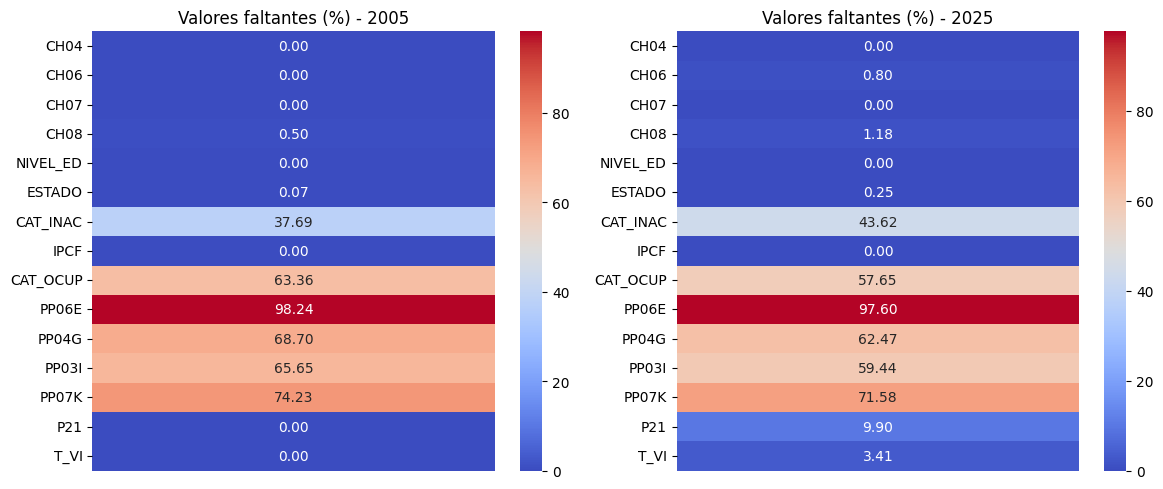

In [164]:
# Contar NaN por año y columna en porcentaje
na_counts = db_recorte.groupby("ANO4").apply(lambda x: x.isna().mean() * 100)

# Crear subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Iterar sobre los años
for i, year in enumerate([2005, 2025]):
    sns.heatmap(
        na_counts.loc[year].to_frame(),  # convierto a fila única
        annot=True, fmt=".2f",           # decimales
        cmap="coolwarm",
        cbar=True,                       # dejo la barra de colores en %
        ax=axes[i]
    )
    axes[i].set_title(f"Valores faltantes (%) - {year}")
    axes[i].set_ylabel("")  # saco el label del eje Y
    axes[i].set_xticks([])

plt.tight_layout()
plt.savefig('heatmap_individuos_nulos.png')
plt.show()

## Parte II. Primer Análisis Exploratorio

### Composición de la EPH por sexo, según año de encuesta

C:\Users\franc\AppData\Local\Temp\ipykernel_15536\3259631261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte['Sexo'] = db_recorte['CH04'].map({1: 'Varón', 2: 'Mujer'})
C:\Users\franc\AppData\Local\Temp\ipykernel_15536\3259631261.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(float(tick.get_text())) for tick in ax.get_xticklabels()])


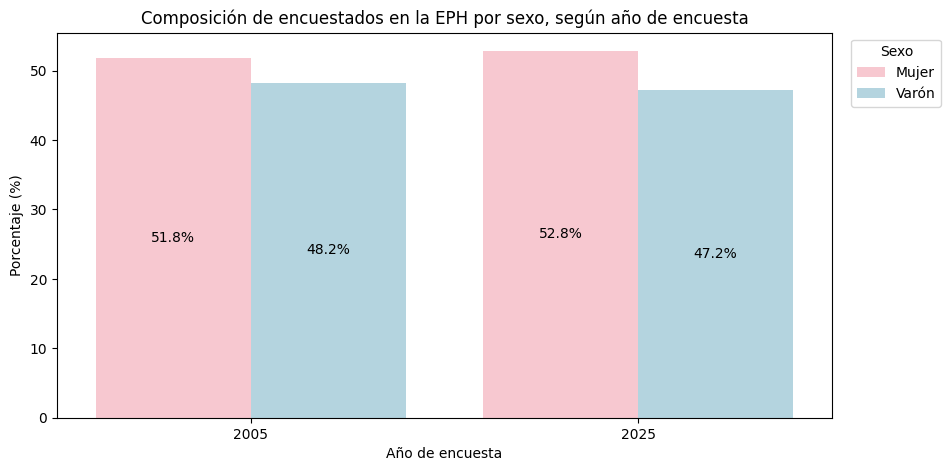

In [197]:
# Crear columna de sexo
db_recorte['Sexo'] = db_recorte['CH04'].map({1: 'Varón', 2: 'Mujer'})

# Calcular counts por año y sexo
counts = db_recorte.groupby(['ANO4','Sexo']).size().reset_index(name='count')

# Calcular porcentaje por año usando transform
counts['pct'] = counts.groupby('ANO4')['count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=counts,
    x='ANO4',
    y='pct',           # porcentaje en lugar de count
    hue='Sexo',
    palette={'Varón':'lightblue','Mujer':'pink'}
)

# Agregar los valores de porcentaje dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height == 0:   # <- ignorar barras con valor 0
        continue
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height / 2,
        s=f'{height:.1f}%',
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

# Ajustar ticks del eje X a enteros
ax.set_xticklabels([int(float(tick.get_text())) for tick in ax.get_xticklabels()])

# Leyenda
ax.legend(title='Sexo', loc='upper right', bbox_to_anchor=(1.15,1))

plt.ylabel("Porcentaje (%)")
plt.xlabel("Año de encuesta")
plt.title("Composición de encuestados en la EPH por sexo, según año de encuesta")
plt.savefig("composicion_sexo_eph.png",bbox_inches='tight')
plt.show()

### Matriz de correlaciones entre variables

Variables a correlacionar:
- CH04
- CH06
- CH07
- CH08
- NIVEL_ED
- ESTADO
- CAT_INAC
- IPCF

Primero, desdoblamos las variables que correspondan entre variables dummies.
Estas serán:
- CH04 (Sexo)
- CH07 (Estado civil)
- CH08 (Tipo de cobertura médica)
- NIVEL_ED (Nivel educativo)
- ESTADO (Condición de actividad)
- CAT_INAC (Categoría de inactividad)

In [227]:
categoricas = ['CH04','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC']
corrpanel = db_recorte.copy()
corrpanel.drop(columns=['Sexo'],inplace=True)

def dummies(variable,codigo,descripcion):
    """ 
    Crea nuevas variables dummies a partir de los argumentos especificados.
    Las referencias son:
    - Variable: es el 'código' a desdoblar en dummies (CH04, CH06, etc.)
    - Código: es la categoría dentro de la variable que se quiere generar como una dummy (que adopte '1' en la fila en la que figura, '0' si no figura, o 'NaN' si originalmente la columna está vacía)
    - Descripción: es la descripción del código de la variable

    Ejemplo:
    La variable CH07 indica el estado civil.
    Sus código son:
        - 1: unido
        - 2: casado:
        - 3: separado
        - 4: viudo
        - 5: soltero

    Entonces, la declaracion de 'dummies(CH07,5,Soltero) generará una columna con título 'Soltero' que tendrá '1' como valor en las filas donde fuera '5' el código en 'CH04', '0' si no lo fuera y 'NaN' si fuera vacío. 
    """
    mask_valid = corrpanel[variable].notna()
    corrpanel.loc[mask_valid & (corrpanel[variable] == int(codigo)), descripcion] = 1
    corrpanel.loc[mask_valid & (corrpanel[variable] != int(codigo)), descripcion] = 0

In [229]:
dummies('CH04',1,'Varón')
dummies('CH04',2,'Mujer')
print(corrpanel)

        CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC       IPCF  \
ANO4                                                                    
2005.0   2.0  38.0   4.0   4.0       1.0     1.0       NaN      36.00   
2005.0   1.0  21.0   1.0   1.0       1.0     1.0       NaN      36.00   
2005.0   2.0  21.0   1.0   4.0       3.0     3.0       4.0      36.00   
2005.0   1.0  16.0   5.0   4.0       1.0     3.0       3.0      36.00   
2005.0   2.0  14.0   5.0   4.0       2.0     3.0       3.0      36.00   
...      ...   ...   ...   ...       ...     ...       ...        ...   
2025.0   2.0  27.0   5.0   4.0       4.0     1.0       NaN       0.00   
2025.0   1.0  31.0   5.0   4.0       3.0     1.0       NaN       0.00   
2025.0   2.0  44.0   3.0   3.0       7.0     3.0       4.0  137666.67   
2025.0   1.0  24.0   5.0   3.0       3.0     3.0       4.0  137666.67   
2025.0   2.0  12.0   5.0   3.0       1.0     3.0       3.0  137666.67   

        CAT_OCUP  PP06E  PP04G  PP03I  PP07K      

In [230]:
dummies('CH07',1,'Unido')
dummies('CH07',2,'Casado')
dummies('CH07',3,'Separado')
dummies('CH07',4,'Viudo')
dummies('CH07',5,'Soltero')
dummies('CH08',1,'OS')
dummies('CH08',2,'Prep.')
dummies('CH08',3,'Publica')
dummies('CH08',4,'-')
dummies('CH08',12,'OS_Prep.')
dummies('CH08',13,'OS_Publica')
dummies('CH08',23,'Prep_Publica')
dummies('CH08',123,'OS_Prep_Publica')
dummies('NIVEL_ED',1,'Prim_inc')
dummies('NIVEL_ED',2,'Prim_com')
dummies('NIVEL_ED',3,'Sec_inc')
dummies('NIVEL_ED',4,'Sec_com')
dummies('NIVEL_ED',5,'Sup_inc')
dummies('NIVEL_ED',6,'Sup_com')
dummies('NIVEL_ED',7,'No_educ')
dummies('ESTADO',1,'Ocupado')
dummies('ESTADO',2,'Desocupado')
dummies('ESTADO',3,'Inactivo')
dummies('ESTADO',4,'Menor_10y')
dummies('CAT_INAC',1,'Jubilado')
dummies('CAT_INAC',2,'Rentista')
dummies('CAT_INAC',3,'Estudiante')
dummies('CAT_INAC',4,'Ama')
dummies('CAT_INAC',5,'Menor_6y')
dummies('CAT_INAC',6,'Discapac')
dummies('CAT_INAC',7,'Otros')

In [231]:
print(corrpanel.columns)

Index(['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC',
       'IPCF', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K', 'P21', 'T_VI',
       'Varón', 'Mujer', 'Unido', 'Casado', 'Separado', 'Viudo', 'Soltero',
       'OS', 'Prep.', 'Publica', '-', 'OS_Prep.', 'OS_Publica', 'Prep_Publica',
       'OS_Prep_Publica', 'Prim_inc', 'Prim_com', 'Sec_inc', 'Sec_com',
       'Sup_inc', 'Sup_com', 'No_educ', 'Ocupado', 'Desocupado', 'Inactivo',
       'Menor_10y', 'Jubilado', 'Rentista', 'Estudiante', 'Ama', 'Menor_6y',
       'Discapac', 'Otros'],
      dtype='object')


In [233]:
corrpanel.drop(columns=categoricas,inplace=True)

In [236]:
corrpanel.rename(columns={'-':'Sin_cobertura'}, inplace = True)

In [237]:
print(corrpanel.columns)

Index(['CH06', 'IPCF', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K', 'P21',
       'T_VI', 'Varón', 'Mujer', 'Unido', 'Casado', 'Separado', 'Viudo',
       'Soltero', 'OS', 'Prep.', 'Publica', 'Sin_cobertura', 'OS_Prep.',
       'OS_Publica', 'Prep_Publica', 'OS_Prep_Publica', 'Prim_inc', 'Prim_com',
       'Sec_inc', 'Sec_com', 'Sup_inc', 'Sup_com', 'No_educ', 'Ocupado',
       'Desocupado', 'Inactivo', 'Menor_10y', 'Jubilado', 'Rentista',
       'Estudiante', 'Ama', 'Menor_6y', 'Discapac', 'Otros'],
      dtype='object')


In [239]:
matrizej = corrpanel.copy()
matrizej.drop(columns = ['CAT_OCUP','PP06E','PP04G','PP03I','PP07K','P21','T_VI'], inplace = True)
print(matrizej.columns)

Index(['CH06', 'IPCF', 'Varón', 'Mujer', 'Unido', 'Casado', 'Separado',
       'Viudo', 'Soltero', 'OS', 'Prep.', 'Publica', 'Sin_cobertura',
       'OS_Prep.', 'OS_Publica', 'Prep_Publica', 'OS_Prep_Publica', 'Prim_inc',
       'Prim_com', 'Sec_inc', 'Sec_com', 'Sup_inc', 'Sup_com', 'No_educ',
       'Ocupado', 'Desocupado', 'Inactivo', 'Menor_10y', 'Jubilado',
       'Rentista', 'Estudiante', 'Ama', 'Menor_6y', 'Discapac', 'Otros'],
      dtype='object')


In [240]:
matrizej.rename(columns = {'CH06':'Edad' , 'IPCF': 'Y per-cap fliar'},inplace = True)

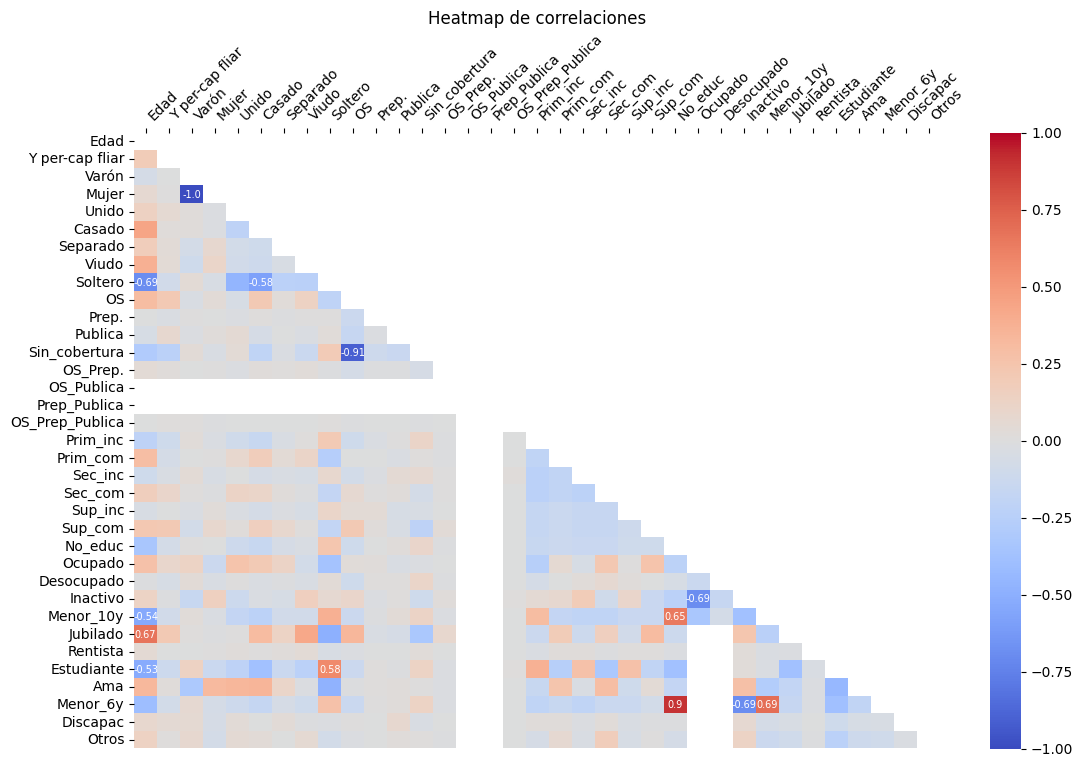

In [254]:
#Creación de la mtriz de correlaciones

# Matriz de correlaciones
corr = matrizej.corr()

# Máscara para triángulo superior
upp_mat = np.triu(corr)

# Crear un DataFrame con anotaciones selectivas (|r| > 0.6)
annot = corr.round(2).astype(str)      # redondeamos a 2 decimales
annot_masked = annot.where(corr.abs() > 0.5, other = "")  # solo mostrar si |corr| > 0.6

plt.figure(figsize=(13,8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1,
    cmap="coolwarm",
    mask=upp_mat,           # mostramos solo la mitad inferior
    annot=annot_masked,     # anotaciones selectivas
    fmt='',                 # no usar formato numérico (ya son strings)
    cbar=True,
    annot_kws={"color": "white", "fontsize": 7}  # texto blanco dentro de cuadraditos
)

# Ajustes de ejes
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='left')

plt.title("Heatmap de correlaciones")
plt.savefig("matriz_correl.png", bbox_inches='tight')
plt.show()